In [36]:
class NODES:
    N: int
    dx: float
    iters: int
    state = {"euler": {}, "rk4": {}, "rk3": {}, "rk2": {}}
    evolvers = {}
    state_history = {"euler": {}, "rk4": {}, "rk3": {}, "rk2": {}}
    errors = {"euler": [], "rk4": [], "rk3": [], "rk2": []}
    actual = []

    def __init__(self, N, dx, iters, state, evolvers):
        self.N = N
        self.dx = dx
        self.iters = iters

        for method in self.state:
            self.state[method] = state

        self.evolvers = evolvers

        for method in self.state_history:
            self.state_history[method]["x"] = []
            for i in range(0, self.N):
                self.state_history[method][f"y{i}"] = []

        for i in range(0, self.iters):
            for method in self.state_history:
                for yn in self.state_history[method]:
                    self.state_history[method][yn].append(self.state[method][yn])

            self.state["rk4"] = self.rk4(self.state["rk4"].copy())

    def rk4(self, state):
        _temp = {}
        G1, G2, G3, G4 = {}, {}, {}, {}
        Gs = [G1, G2, G3, G4]

        for idx, Gi in enumerate(Gs):
            if idx == 0:
                Gsw = 0
                _temp = {k:v for k,v in state.items() if k!="x"}
            else:
                Gsw = 0.5
                if idx == 4: Gsw = 1
                _temp = {k:v + self.dx*Gsw*Gs[idx - 1][k] for k,v in state.items() if k!="x"}
            _temp["x"] = state["x"] + self.dx*Gsw

            for yn in state:
                exec(f"{yn}={_temp[yn]}")
            for yn in state:
                if yn != "x":
                    Gi[yn] = eval(self.evolvers[yn])
        for yn in state:
            if yn == "x":
                state[yn] += self.dx
            else:
                state[yn] += (self.dx/6)*(Gs[0][yn] + 2*Gs[1][yn] + 2*Gs[2][yn] + Gs[3][yn])

        return state
                

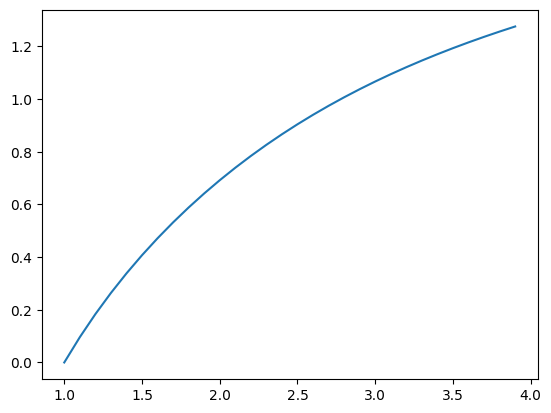

In [38]:
nodes = NODES(2, 0.1, 30, {"x":1,"y0":0,"y1":1}, {"y0":"y1", "y1":"(2*y0/x)-(x*y1)"})

import matplotlib.pyplot as plt

plt.plot(nodes.state_history["rk4"]["x"], nodes.state_history["rk4"]["y0"])
plt.show()